In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer, Flatten, BatchNormalization, Layer, Input, RandomRotation, RandomContrast, RandomFlip, Resizing, Rescaling
from tensorflow.keras.optimizers.legacy import Adam #error mark
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Model
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_probability as tfp


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 94% 326M/346M [00:01<00:00, 232MB/s]
100% 346M/346M [00:01<00:00, 207MB/s]


In [ ]:
!unzip 'intel-image-classification'

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
train_dir = '/content/seg_train/seg_train/'
test_dir = '/content/seg_test/seg_test/'

In [ ]:
class_names = [name for name in os.listdir(train_dir)]
class_names

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

In [ ]:
# View an image
def view_random_image(target_dir, target_class):
  # setup target dir
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # read and plot
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img


Image shape: (150, 150, 3)
Image shape: (150, 150, 3)
Image shape: (150, 150, 3)
Image shape: (150, 150, 3)
Image shape: (150, 150, 3)
Image shape: (150, 150, 3)


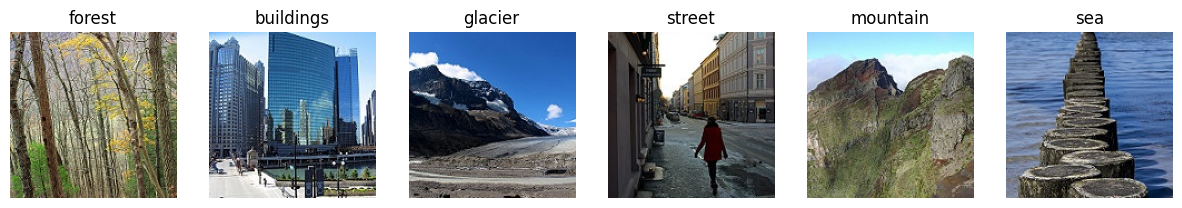

In [ ]:
count = 0
plt.figure(figsize=(15,15))
for class_name in class_names:
  count=count+1
  plt.subplot(1, len(class_names), count)
  show_img = view_random_image(train_dir, class_name)
  #print(count)

Load and Preprocess

In [ ]:
img_size = 256
BATCH_SIZE = 32
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(img_size, img_size),
    shuffle=True,
    seed=99,
)

Found 14034 files belonging to 6 classes.


In [ ]:
for image, label in enumerate(train_dataset.take(1)):
  print(image, label)

0 (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[1.27000000e+02, 1.79000000e+02, 2.36000000e+02],
         [1.27000000e+02, 1.79000000e+02, 2.36000000e+02],
         [1.27000000e+02, 1.79000000e+02, 2.36000000e+02],
         ...,
         [1.29964844e+02, 1.92964844e+02, 2.45964844e+02],
         [1.29378906e+02, 1.92378906e+02, 2.45378906e+02],
         [1.29000000e+02, 1.92000000e+02, 2.45000000e+02]],

        [[1.27000000e+02, 1.79000000e+02, 2.36000000e+02],
         [1.27143570e+02, 1.79287140e+02, 2.35856430e+02],
         [1.27365585e+02, 1.79731171e+02, 2.35634415e+02],
         ...,
         [1.30722656e+02, 1.92964844e+02, 2.46343750e+02],
         [1.30136719e+02, 1.92378906e+02, 2.45757812e+02],
         [1.29757812e+02, 1.92000000e+02, 2.45378906e+02]],

        [[1.27000000e+02, 1.79000000e+02, 2.36000000e+02],
         [1.27365585e+02, 1.79731171e+02, 2.35634415e+02],
         [1.27930923e+02, 1.80861847e+02, 2.35069077e+02],
         ...,
       

In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(img_size, img_size),
    shuffle=True,
    seed=99,
)

Found 3000 files belonging to 6 classes.


In [ ]:
for image, label in enumerate(val_dataset.take(1)):
  print(image, label)

0 (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         ...,
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.       ]],

        [[ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         ...,
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.       ]],

        [[ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         [ 24.       ,  67.       , 120.       ],
         ...,
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.       ],
         [ 28.       ,  75.       , 129.  

Data Augmentation

In [ ]:
# tf.keras.layer Augmentation
augment_layers = tf.keras.Sequential([
    RandomRotation(factor=(-0.025, 0.025)),
    RandomFlip(mode='horizontal'),
    RandomContrast(factor=0.1)
])

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
def augment_layer(image, label):
  return augment_layers(image, training = True), label

In [ ]:

IM_SIZE=224
resize_rescale_layers = tf.keras.Sequential([
       Resizing(IM_SIZE, IM_SIZE),
       Rescaling(1./255),
])

In [ ]:


lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (None, None, 3), ),
    resize_rescale_layers,
    Conv2D(filters=8, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2*1),

    Conv2D(filters=2*8, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2*1),

    Flatten(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(6, activation = 'softmax')


   ])

lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)     

In [ ]:
train_dataset_1 = train_dataset.shuffle(buffer_size=16,).map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.shuffle(buffer_size=16,).map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
mixed_dataset = tf.data.Dataset.zip(train_dataset_1, train_dataset_2)

In [ ]:
def mixup_augmentation(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
  lamda = tfp.distributions.Beta(0.2, 0.2)
  lamda = lamda.sample(1)[0]

  image = lamda * image_1 + (1-lamda)*image_2
  label = lamda * tf.cast(label_1, dtype=tf.float32) + (1-lamda)*tf.cast(label_2, dtype=tf.float32)

  return image, label


test


In [8]:
import tensorflow_probability as tfp
import tensorflow as tf

lamda = tfp.distributions.Beta(0.2, 0.2)
lamda = lamda.sample(1)[0]
label_1 = [0,0,0,1,0,0]
label_2 = [1,0,0,0,0,0]


label = lamda * tf.cast(label_1, dtype=tf.float32) + (1-lamda)*tf.cast(label_2, dtype=tf.float32)
label
#one = tf.ones(
    #(1, 6),
    #dtype=tf.dtypes.float32,
    #name=None,
    #layout=None
#)
#one

#labelF = lamda * tf.cast(label_1, dtype=tf.float32) + (one-lamda)*tf.cast(label_2, dtype=tf.float32)


<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.0246892, 0.       , 0.       , 0.9753108, 0.       , 0.       ],
      dtype=float32)>

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow.random import gamma as tf_random_gamma
import keras
#from keras import ops

ImportError: cannot import name 'ops' from 'keras' (/usr/local/lib/python3.10/dist-packages/keras/__init__.py)

In [ ]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf_random_gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf_random_gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.keras.ops.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = keras.ops.reshape(l, (batch_size, 1, 1, 1))
    y_l = keras.ops.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)


In [ ]:
BATCH_SIZE = 32
train_dataset_aug = (
    train_dataset
    .shuffle(buffer_size = 16, reshuffle_each_iteration = True)
    .map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    #.batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
train_dataset_aug

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
val_dataset_lol = (
    val_dataset
    .shuffle(buffer_size = 16, reshuffle_each_iteration = True)
    #.map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    #.batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset_lol

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
BATCH_SIZE = 32
train_dataset_mix = (
    mixed_dataset
    .shuffle(buffer_size = 16, reshuffle_each_iteration = True)
    .map(mix_up, num_parallel_calls=tf.data.AUTOTUNE)
    #.batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

AttributeError: in user code:

    File "<ipython-input-35-612e090b8429>", line 11, in mix_up  *
        batch_size = tf.keras.ops.shape(images_one)[0]

    AttributeError: module 'tensorflow.keras' has no attribute 'ops'


In [ ]:
val_dataset_m = (
    val_dataset
    .shuffle(buffer_size = 16, reshuffle_each_iteration = True)
    #.map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    #.batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
for image, label in enumerate(train_dataset_mix.take(1)):
  print(image, label)

0 (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[103.45872  , 112.746796 , 115.0407   ],
         [103.93456  , 113.12895  , 115.17939  ],
         [104.2407   , 113.350525 , 115.217316 ],
         ...,
         [230.97472  , 225.14206  , 186.70657  ],
         [231.807    , 225.86133  , 188.3404   ],
         [231.58807  , 225.64803  , 188.2045   ]],

        [[103.14625  , 112.678955 , 115.35793  ],
         [103.72355  , 113.12863  , 115.49459  ],
         [103.97742  , 113.26398  , 115.325645 ],
         ...,
         [229.90498  , 224.29706  , 186.29153  ],
         [230.39171  , 224.6749   , 187.66133  ],
         [230.06749  , 224.32312  , 187.37834  ]],

        [[101.95563  , 113.13118  , 115.48777  ],
         [102.332855 , 113.370514 , 115.49301  ],
         [102.54019  , 113.447205 , 115.33717  ],
         ...,
         [234.43935  , 228.60234  , 189.77513  ],
         [234.65352  , 229.13652  , 191.55402  ],
         [234.26405  , 229.1065   , 191.39

In [ ]:
for image, label in enumerate(val_dataset_m.take(1)):
  print(image, label)

0 (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[2.80000000e+01, 1.07000000e+02, 1.63000000e+02],
         [3.33046875e+01, 1.11546875e+02, 1.66789062e+02],
         [4.15078125e+01, 1.18578125e+02, 1.72648438e+02],
         ...,
         [1.49789062e+02, 1.69929688e+02, 1.94000000e+02],
         [1.46273438e+02, 1.68757812e+02, 1.94000000e+02],
         [1.44000000e+02, 1.68000000e+02, 1.94000000e+02]],

        [[3.93671875e+01, 1.16851562e+02, 1.72472656e+02],
         [4.39540253e+01, 1.20680588e+02, 1.75543869e+02],
         [5.10470734e+01, 1.26601761e+02, 1.80293167e+02],
         ...,
         [1.52062500e+02, 1.71418671e+02, 1.94000000e+02],
         [1.48546875e+02, 1.69802765e+02, 1.94000000e+02],
         [1.46273438e+02, 1.68757812e+02, 1.94000000e+02]],

        [[5.69453125e+01, 1.32085938e+02, 1.87121094e+02],
         [6.04220734e+01, 1.34804886e+02, 1.89082230e+02],
         [6.57985077e+01, 1.39009445e+02, 1.92114914e+02],
         ...,
       

In [ ]:
val_dataset_m

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
train_dataset_mix

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
print(val_dataset_m.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>


In [ ]:
# Compile
lenet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# EarlyStopping callback for model_1
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Fit the model
lenet_history_mix = lenet_model.fit(train_dataset_aug,
                                epochs=40,
                                steps_per_epoch=len(train_dataset_aug),
                                validation_data=val_dataset_lol,
                                validation_steps=len(val_dataset_lol),
                                callbacks=[early_stopping]
                                )

Epoch 1/40
439/439 [==============================] - 108s 227ms/step - loss: 0.9853 - accuracy: 0.6497 - val_loss: 1.2518 - val_accuracy: 0.5253
Epoch 2/40
439/439 [==============================] - 101s 229ms/step - loss: 0.6559 - accuracy: 0.7658 - val_loss: 1.0693 - val_accuracy: 0.6343
Epoch 3/40
439/439 [==============================] - 97s 220ms/step - loss: 0.6028 - accuracy: 0.7862 - val_loss: 0.8952 - val_accuracy: 0.6757
Epoch 4/40
439/439 [==============================] - 99s 224ms/step - loss: 0.5478 - accuracy: 0.8031 - val_loss: 0.6150 - val_accuracy: 0.7877
Epoch 5/40
439/439 [==============================] - 99s 222ms/step - loss: 0.4887 - accuracy: 0.8274 - val_loss: 0.5931 - val_accuracy: 0.7950
Epoch 6/40
439/439 [==============================] - 100s 226ms/step - loss: 0.4546 - accuracy: 0.8384 - val_loss: 0.7699 - val_accuracy: 0.7323
Epoch 7/40
439/439 [==============================] - 101s 228ms/step - loss: 0.4291 - accuracy: 0.8477 - val_loss: 0.5731 - va

In [ ]:
# Check if the training process was interrupted
if lenet_history_mix.history['loss'] == []:
    print("Training was interrupted before it started.")

NameError: name 'lenet_history_mix' is not defined